In [1]:
import numpy as np
import numpy.fft as fft
from scipy import signal
import matplotlib.pyplot as plt
import time
import scipy.io.wavfile
import csv

# Sončne pege

In [38]:
def korelacija(g, h, casi):
    N = max(len(g), len(h))
    
    tau = np.linspace(0, casi[N-1]- casi[0], N)
    G = np.pad(fft.fft(g), [(0, N-len(g))], mode='constant')
    H = np.pad(fft.fft(h), [(0, N-len(h))], mode='constant')

    Phi = fft.ifft(G * np.conj(H))
    N_n = np.arange(N)[::-1]
    return np.real(Phi)[:N//2] / N_n[:N//2], tau[:N//2]

In [18]:
def read_sunspots(filename, L, natancnost='y'):
    with open(filename, newline='') as data:
        podatki = csv.reader(data, delimiter = ';', quotechar='|')
        j = 0
        
        year = np.zeros(L)
        month = np.zeros(L)
        day = np.zeros(L)
        datefrac = np.zeros(L)
        totsunspot = np.zeros(L)
        stdev = np.zeros(L)
        observations = np.zeros(L)
        def_prov = np.zeros(L)

        for vrsta in podatki:
            year[j] = float(vrsta[0])
            if natancnost == 'y':
                totsunspot[j] = float(vrsta[1])
                stdev[j] = float(vrsta[2])
                observations[j] = float(vrsta[3])
                def_prov[j] = float(vrsta[4])
            elif natancnost == 'm':
                month[j] = float(vrsta[1])
                datefrac[j] = float(vrsta[2])
                totsunspot[j] = float(vrsta[3])
                stdev[j] = float(vrsta[4])
                observations[j] = float(vrsta[5])
                def_prov[j] = float(vrsta[6])
            else:
                month[j] = float(vrsta[1])
                day[j] = float(vrsta[2])
                datefrac[j] = float(vrsta[3])
                totsunspot[j] = float(vrsta[4])
                stdev[j] = float(vrsta[5])
                observations[j] = float(vrsta[6])
                def_prov[j] = float(vrsta[7])                

            j += 1

    return totsunspot, datefrac



spots_d, casi_d = read_sunspots('sunspots/SN_d_tot_V2.0.csv', 74449, 'd')
spots_m, casi_m = read_sunspots('sunspots/SN_m_tot_V2.0.csv', 3274, 'm')
spots_ms, casi_ms = read_sunspots('sunspots/SN_ms_tot_V2.0.csv', 3274, 'm')
spots_y, casi_y = read_sunspots('sunspots/SN_y_tot_V2.0.csv', 321, 'y')

sunspots = [spots_d, spots_m, spots_ms, spots_y]
casi = [casi_d, casi_m, casi_ms, casi_y]

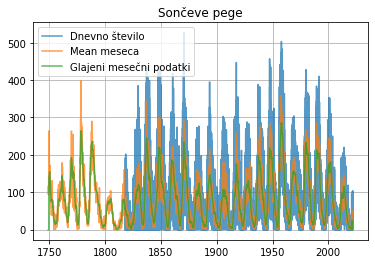

In [36]:
plt.title('Sončeve pege')
plt.plot(casi_d, spots_d, alpha=0.75, label='Dnevno število')
plt.plot(casi_m, spots_m, alpha=0.75, label='Mean meseca')
plt.plot(casi_ms, spots_ms, alpha=0.75, label='Glajeni mesečni podatki')

plt.legend()
plt.grid()
plt.savefig('grafi/sunspots.png')
plt.show()

### Avtokorelacije

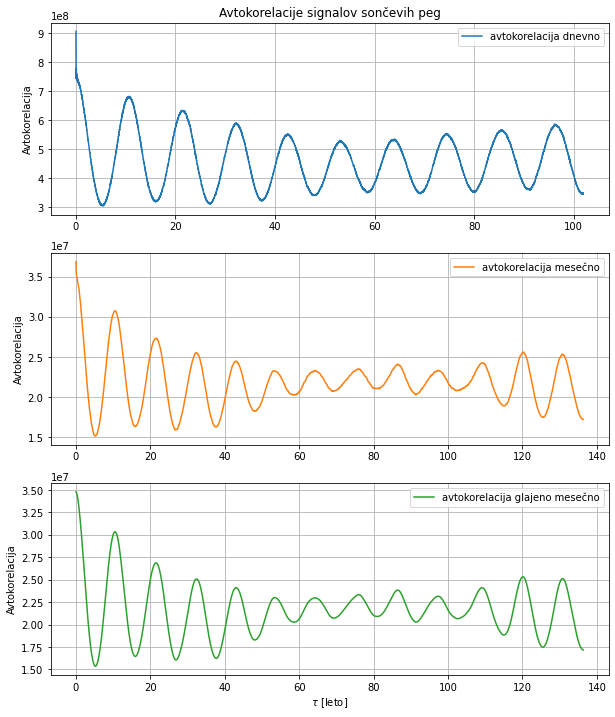

In [55]:
def avtokoreliraj(data, casi):
    intervali = ['dnevno', 'mesečno', 'glajeno mesečno']
    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    fig, ax = plt.subplots(3, 1, figsize=(10, 12))
    for i in range(3):
        a, taua = korelacija(data[i], data[i], casi[i])

        ax[i].plot(taua, a, label=f'avtokorelacija {intervali[i]}', color=colors[i])
        ax[i].set_ylabel('Avtokorelacija')
        ax[i].grid()
        ax[i].legend()  

    ax[2].set_xlabel(r'$\tau$ [leto]')
    ax[0].set_title('Avtokorelacije signalov sončevih peg')
    
    plt.savefig('grafi/avtokorelacija-sunspots.png')
    plt.show()

avtokoreliraj(sunspots, casi)

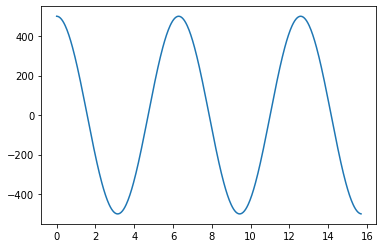

In [46]:
x=np.linspace(0, 10*np.pi, 1000)
y = np.sin(x)
cor, tau = korelacija(y, y, x)
plt.plot(tau, cor)
plt.show()